# Forecasting Net Prophet

You’re a growth analyst at [MercadoLibre](http://investor.mercadolibre.com/investor-relations). With over 200 million users, MercadoLibre is the most popular e-commerce site in Latin America. You've been tasked with analyzing the company's financial and user data in clever ways to make the company grow. So, you want to find out if the ability to predict search traffic can translate into the ability to successfully trade the stock.

Instructions

This section divides the instructions for this Challenge into four steps and an optional fifth step, as follows:

* Step 1: Find unusual patterns in hourly Google search traffic

* Step 2: Mine the search traffic data for seasonality

* Step 3: Relate the search traffic to stock price patterns

* Step 4: Create a time series model with Prophet

* Step 5 (optional): Forecast revenue by using time series models

The following subsections detail these steps.

## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Use hvPlot to visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

2. Using hvPlot, visualize this traffic as a heatmap, referencing the `index.hour` as the x-axis and the `index.dayofweek` as the y-axis. Does any day-of-week effect that you observe concentrate in just a few hours of that day?

3. Group the search data by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?

## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then use hvPlot to plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?

## Step 5 (Optional): Forecast Revenue by Using Time Series Models

A few weeks after your initial analysis, the finance group follows up to find out if you can help them solve a different problem. Your fame as a growth analyst in the company continues to grow!

Specifically, the finance group wants a forecast of the total sales for the next quarter. This will dramatically increase their ability to plan budgets and to help guide expectations for the company investors.

To do so, complete the following steps:

1. Read in the daily historical sales (that is, revenue) figures, and then apply a Prophet model to the data.

2. Interpret the model output to identify any seasonal patterns in the company's revenue. For example, what are the peak revenue days? (Mondays? Fridays? Something else?)

3. Produce a sales forecast for the finance group. Give them a number for the expected total sales in the next quarter. Include the best- and worst-case scenarios to help them make better plans.


## Install and import the required libraries and dependencies

In [ ]:
# Install the required libraries
!pip install pystan
!pip install fbprophet
!pip install hvplot
!pip install holoviews

In [33]:
# Import the required libraries and dependencies
import pandas as pd
import numpy as np
import holoviews as hv
from fbprophet import Prophet
import hvplot.pandas
import datetime as dt
from datetime import datetime, timezone
%matplotlib inline

## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Use hvPlot to visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?


#### Step 1: Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Use hvPlot to visualize the results. Do any unusual patterns exist?

In [3]:
# Upload the "google_hourly_search_trends.csv" file into Colab, then store in a Pandas DataFrame

from google.colab import files
uploaded = files.upload()


Saving google_hourly_search_trends.csv to google_hourly_search_trends.csv
Saving mercado_daily_revenue.csv to mercado_daily_revenue.csv
Saving mercado_stock_price.csv to mercado_stock_price.csv


In [4]:
# Set the "Date" column as the Datetime Index.

df_mercado_trends = pd.read_csv(
    "google_hourly_search_trends.csv",
    parse_dates=True,
    infer_datetime_format=True
)

df_mercado_trends["Date"] = pd.to_datetime(
    df_mercado_trends["Date"],
    infer_datetime_format=True,
    utc=True
)

df_mercado_trends["Date"] = df_mercado_trends["Date"].dt.tz_convert("America/Argentina/Buenos_Aires")
df_mercado_trends.rename(columns={"Date": "date"},inplace=True)

In [5]:
# Review the data types of the DataFrame using the info function
df_mercado_trends.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37106 entries, 0 to 37105
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype                                         
---  ------         --------------  -----                                         
 0   date           37106 non-null  datetime64[ns, America/Argentina/Buenos_Aires]
 1   Search Trends  37106 non-null  int64                                         
dtypes: datetime64[ns, America/Argentina/Buenos_Aires](1), int64(1)
memory usage: 579.9 KB


In [6]:
# Set "Date" columnn as the index
df_mercado_trends.set_index("date",inplace=True)

In [7]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Slice the DataFrame to just the month of May 2020
df_may_2020 = df_mercado_trends.loc["2020-05"]

# Use hvPlot to visualize the data for May 2020
df_may_2020.hvplot(title="MercadoLibre Google Search Trends May 2020")


Output hidden; open in https://colab.research.google.com to view.

#### Step 2: Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

In [8]:
# Calculate the sum of the total search traffic for May 2020
traffic_may_2020 = df_may_2020["Search Trends"].sum()

# View the traffic_may_2020 value
traffic_may_2020


38210

In [9]:
# Calcluate the monhtly median search traffic across all months 
# Group the DataFrame by index year and then index month, chain the sum and then the median functions

median_monthly_traffic = df_mercado_trends.groupby([df_mercado_trends.index.year,df_mercado_trends.index.month])["Search Trends"].sum().median()

# View the median_monthly_traffic value
median_monthly_traffic

## alternatively maybe I could group by day and month and year and find median value for given day for each month across all years and compare to median daily value for May 2020 using stacked area


35048.0

In [10]:
monthly_traffic_totals = df_mercado_trends.groupby([df_mercado_trends.index.year,df_mercado_trends.index.month])["Search Trends"].sum()

max_monthly_traffic = monthly_traffic_totals.max()

mean_monthly_traffic = monthly_traffic_totals.mean()

In [11]:
# Compare the seach traffic for the month of May 2020 to the overall monthly median value
hv.extension('bokeh')

median_monthly_df = pd.DataFrame({"median_monthly_traffic": median_monthly_traffic, "traffic_May_2020": traffic_may_2020, "highest_monthly_traffic": max_monthly_traffic, "mean_monthly_traffic": mean_monthly_traffic}, index=[0])

median_monthly_df.hvplot(kind="bar", title="MercadoLibre Monthly Google Traffic")


Output hidden; open in https://colab.research.google.com to view.

##### Answer the following question: 

**Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:** The seasonality of search trends shows peak times in the evenings. On the line graph in step 1, "MercadoLibre Google Search Trends May 2020," we see a clear increase the day before and day of the release of Q1 2020 financial results (May 5) above the overall trend for that month. 

Furthermore, we see in step 2 from the bar graph "MercadoLibre Monthly Google Traffic" that total Google search traffic for May 2020 was above the median monthly for all months in the dataset. 

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:


1. Using hvPlot, visualize this traffic as a heatmap, referencing the `index.hour` as the x-axis and the `index.dayofweek` as the y-axis. Does any day-of-week effect that you observe concentrate in just a few hours of that day?

2. Group the search data by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?


#### Step 1: Using hvPlot, visualize this traffic as a heatmap, referencing the `index.hour` as the x-axis and the `index.dayofweek` as the y-axis. 

In [12]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Group the hourly search data to plot (use hvPlot) the average traffic by the day of week 
day_names = [(0, 'Mon'), (1, 'Tue'), (2, 'Wed'), (3, 'Thu'), (4, 'Fri'), (5, 'Sat'), (6, 'Sun')]

df_mercado_trends.hvplot.heatmap(
    title="MercadoLibre Google Search Trends by hour of day and day of week",
    x='index.hour',
    y='index.dayofweek',
    C='Search Trends',
    xlabel='hour of day',
    ylabel='day of week',
    cmap='OrRd',
    yticks=day_names
).aggregate(function=np.mean)


Output hidden; open in https://colab.research.google.com to view.

##### Answer the following question:

**Question:** Does any day-of-week effect that you observe concentrate in just a few hours of that day?

**Answer:** The highest traffic for all days is observed during hours 20 and 21, or 7pm - 9pm. Within this time interval, the peak traffic occurs on Mondays.

#### Step 2: Group the search data by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?

In [13]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Group the hourly search data to plot (use hvPlot) the average traffic by the week of the year
traffic_weekofyear = df_mercado_trends.groupby(df_mercado_trends.index.weekofyear).sum()

traffic_weekofyear.hvplot.heatmap(title='Search Trends by week of year', cmap='OrRd')

Output hidden; open in https://colab.research.google.com to view.

##### Answer the following question:

**Question:** Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?

**Answer:** The search traffic does not appear to increase during significantly during what we consider to be the holiday period (weeks 40 through 52), but does appear to increase dramatically during weeks 22 through 36, which are approximately the winter season in South America. This time of year does include some major shopping holidays for South America such as Father's Day and Children's Day.

## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then use hvPlot to plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?


#### Step 1: Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

In [14]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
#from google.colab import files
#uploaded = files.upload()

df_mercado_stock = pd.read_csv('mercado_stock_price.csv', parse_dates=True, infer_datetime_format=True)

df_mercado_stock["date"] = pd.to_datetime(
    df_mercado_stock["date"],
    infer_datetime_format=True,
    utc=True
)

df_mercado_stock["date"] = df_mercado_stock["date"].dt.tz_convert("America/Argentina/Buenos_Aires")

df_mercado_stock.set_index('date',inplace=True)
# View the first and last five rows of the DataFrame
df_mercado_stock


,close
date,
2015-01-02 06:00:00-03:00,127.670
2015-01-02 07:00:00-03:00,125.440
2015-01-02 08:00:00-03:00,125.570
2015-01-02 09:00:00-03:00,125.400
2015-01-02 10:00:00-03:00,125.170
...,...
2020-07-31 08:00:00-03:00,1105.780
2020-07-31 09:00:00-03:00,1087.925
2020-07-31 10:00:00-03:00,1095.800


In [15]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Use hvPlot to visualize the closing price of the df_mercado_stock DataFrame
df_mercado_stock.hvplot(title="MercadoLibre Stock Price")


Output hidden; open in https://colab.research.google.com to view.

In [16]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
# Concatenate the DataFrame by columns (axis=1), and drop any rows with only one column of data
mercado_stock_trends_df = pd.concat([df_mercado_trends, df_mercado_stock], axis=1, join='inner')
mercado_stock_trends_df.dropna(inplace=True)

# View the first and last five rows of the DataFrame
mercado_stock_trends_df


,Search Trends,close
date,,
2016-06-01 06:00:00-03:00,6,135.160
2016-06-01 07:00:00-03:00,12,136.630
2016-06-01 08:00:00-03:00,22,136.560
2016-06-01 09:00:00-03:00,33,136.420
2016-06-01 10:00:00-03:00,40,136.100
...,...,...
2020-07-31 08:00:00-03:00,20,1105.780
2020-07-31 09:00:00-03:00,32,1087.925
2020-07-31 10:00:00-03:00,41,1095.800


#### Step 2: Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then use hvPlot to plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

In [17]:
# For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06) 
first_half_2020 = mercado_stock_trends_df.loc['2020-01':'2020-06']

# View the first and last five rows of first_half_2020 DataFrame
first_half_2020


,Search Trends,close
date,,
2020-01-02 06:00:00-03:00,9,601.085
2020-01-02 07:00:00-03:00,14,601.290
2020-01-02 08:00:00-03:00,25,615.410
2020-01-02 09:00:00-03:00,37,611.400
2020-01-02 10:00:00-03:00,50,611.830
...,...,...
2020-06-30 08:00:00-03:00,17,976.170
2020-06-30 09:00:00-03:00,27,977.500
2020-06-30 10:00:00-03:00,37,973.230


In [18]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Use hvPlot to visualize the close and Search Trends data
# Plot each column on a separate axes using the following syntax
first_half_2020_grouped = first_half_2020.groupby(first_half_2020.index.date).mean()
first_half_2020_grouped.hvplot(shared_axes=False, subplots=True).cols(1)


Output hidden; open in https://colab.research.google.com to view.

##### Answer the following question:

**Question:** Do both time series indicate a common trend that’s consistent with this narrative?

**Answer:** The stock price clearly follows the narrative with a sharp decline in March of 2020 followed by a quick recovery. We also see a sharp decline with search trends at almost exactly the same time the stock price went down, but we do not quite see the same recovery. The sharp increase in search trends in May as we have seen is likely explained by the release of Q1 financials. Soon after search trends fall back to levels only slightly above and even as low as those seen just after the large decline in March and overall do not return to rather steady higher levels seen prior to March during this period. 

#### Step 3: Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

* “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

* “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis


In [19]:
# Create a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends
# This column should shift the Search Trends information by one hour
mercado_stock_trends_df.rename(columns={'Search Trends': 'search_trends'},inplace=True)
mercado_stock_trends_df['lagged_search_trends'] = mercado_stock_trends_df['search_trends'].shift(1)


In [20]:
# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window
mercado_stock_trends_df['stock_volatility'] = mercado_stock_trends_df['close'].pct_change().rolling(window=4).std()


In [21]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Use hvPlot to visualize the stock volatility
mercado_stock_trends_df['stock_volatility'].hvplot()


Output hidden; open in https://colab.research.google.com to view.

**Solution Note:** Note how volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

In [22]:
# Create a new column in the mercado_stock_trends_df DataFrame called Hourly Stock Return
# This column should calculate hourly return percentage of the closing price
mercado_stock_trends_df['hourly_stock_return'] = mercado_stock_trends_df['close'].pct_change()


In [23]:
# View the first and last five rows of the mercado_stock_trends_df DataFrame
mercado_stock_trends_df


,search_trends,close,lagged_search_trends,stock_volatility,hourly_stock_return
date,,,,,
2016-06-01 06:00:00-03:00,6,135.160,NaN,NaN,NaN
2016-06-01 07:00:00-03:00,12,136.630,6.0,NaN,0.010876
2016-06-01 08:00:00-03:00,22,136.560,12.0,NaN,-0.000512
2016-06-01 09:00:00-03:00,33,136.420,22.0,NaN,-0.001025
2016-06-01 10:00:00-03:00,40,136.100,33.0,0.006134,-0.002346
...,...,...,...,...,...
2020-07-31 08:00:00-03:00,20,1105.780,11.0,0.012837,0.006380
2020-07-31 09:00:00-03:00,32,1087.925,20.0,0.013549,-0.016147
2020-07-31 10:00:00-03:00,41,1095.800,32.0,0.013295,0.007239


#### Step 4: Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

In [24]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
mercado_stock_trends_df[['stock_volatility', 'lagged_search_trends', 'hourly_stock_return']].corr()


,stock_volatility,lagged_search_trends,hourly_stock_return
stock_volatility,1.000000,-0.148938,0.061424
lagged_search_trends,-0.148938,1.000000,0.017929
hourly_stock_return,0.061424,0.017929,1.000000


##### Answer the following question:


**Question:** Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

**Answer:** There exists little to no correlation between lagged search traffic and stock price returns. There exists a very weak negative correlation between lagged search trafffic and stock volatility, however at this time interval, the predictable relationship is too weak to present any actionable signal.  

## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?


#### Step 1: Set up the Google search data for a Prophet forecasting model.

In [41]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index
mercado_prophet_df = df_mercado_trends.reset_index()

# Label the columns ds and y so that the syntax is recognized by Prophet
mercado_prophet_df.columns = ['ds', 'y']

# Drop any NaN values from the prophet_df DataFrame
mercado_prophet_df = mercado_prophet_df.dropna()

# View the first and last five rows of the mercado_prophet_df DataFrame
mercado_prophet_df['ds'] = mercado_prophet_df['ds'].dt.tz_localize(None)
mercado_prophet_df

,ds,y
0,2016-05-31 21:00:00,97
1,2016-05-31 22:00:00,92
2,2016-05-31 23:00:00,76
3,2016-06-01 00:00:00,60
4,2016-06-01 01:00:00,38
...,...,...
37101,2020-09-07 17:00:00,71
37102,2020-09-07 18:00:00,83
37103,2020-09-07 19:00:00,96
37104,2020-09-07 20:00:00,97


In [28]:
# Call the Prophet function, store as an object
model_mercado_trends = Prophet()


In [36]:
# Fit the time-series model.
model_mercado_trends.fit(mercado_prophet_df)


In [37]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)
future_mercado_trends = model_mercado_trends.make_future_dataframe(periods=2000, freq='H')

# View the last five rows of the future_mercado_trends DataFrame
future_mercado_trends.tail()


,ds
39101,2020-11-30 01:00:00
39102,2020-11-30 02:00:00
39103,2020-11-30 03:00:00
39104,2020-11-30 04:00:00
39105,2020-11-30 05:00:00


In [38]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame
forecast_mercado_trends = model_mercado_trends.predict(future_mercado_trends)

# Display the first five rows of the forecast_mercado_trends DataFrame
forecast_mercado_trends.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-05-31 21:00:00,44.852363,80.782981,99.040794,44.852363,44.852363,44.858785,44.858785,44.858785,41.453156,...,1.861366,1.861366,1.861366,1.544263,1.544263,1.544263,0.0,0.0,0.0,89.711148
1,2016-05-31 22:00:00,44.853066,78.271226,94.717406,44.853066,44.853066,41.304579,41.304579,41.304579,37.944018,...,1.811257,1.811257,1.811257,1.549303,1.549303,1.549303,0.0,0.0,0.0,86.157645
2,2016-05-31 23:00:00,44.853768,67.359037,84.800159,44.853768,44.853768,30.980957,30.980957,30.980957,27.656991,...,1.769654,1.769654,1.769654,1.554312,1.554312,1.554312,0.0,0.0,0.0,75.834725
3,2016-06-01 00:00:00,44.854471,52.463578,68.882908,44.854471,44.854471,15.713510,15.713510,15.713510,12.417571,...,1.736650,1.736650,1.736650,1.559290,1.559290,1.559290,0.0,0.0,0.0,60.567981
4,2016-06-01 01:00:00,44.855174,34.988269,52.102999,44.855174,44.855174,-1.401619,-1.401619,-1.401619,-4.678055,...,1.712201,1.712201,1.712201,1.564236,1.564236,1.564236,0.0,0.0,0.0,43.453555


#### Step 2: After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

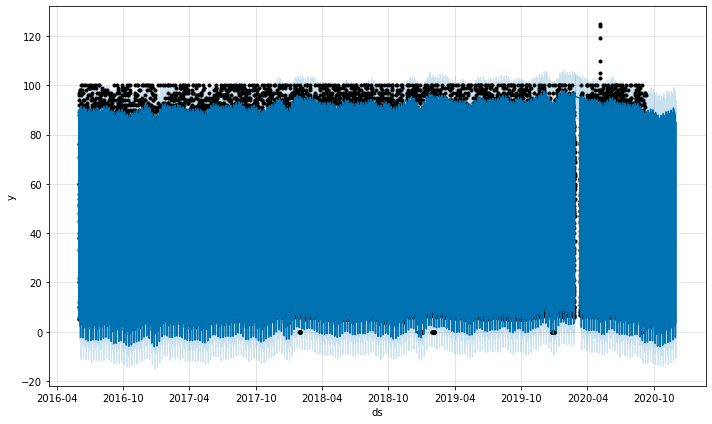

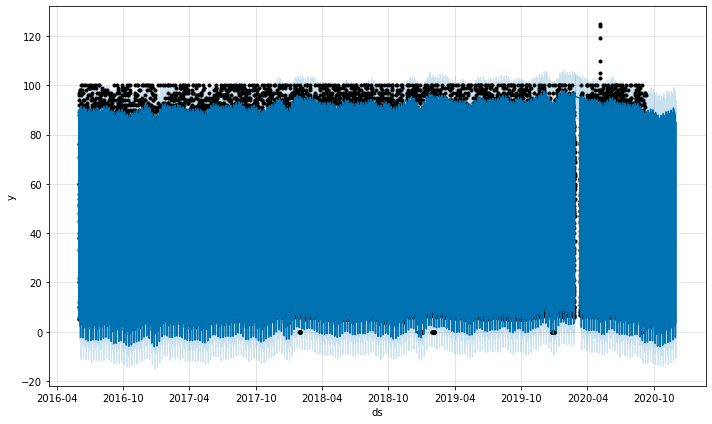

In [39]:
# Plot the Prophet predictions for the Mercado trends data
model_mercado_trends.plot(forecast_mercado_trends)

##### Answer the following question:

**Question:**  How's the near-term forecast for the popularity of MercadoLibre?

**Answer:** The near-term forecast for the popularity of MercadoLibre shows a continuation of a steady decline that began around 2020-03 before beginning a recovery around 2020-11.


#### Step 3: Plot the individual time series components of the model to answer the following questions:

* What time of day exhibits the greatest popularity?

* Which day of the week gets the most search traffic?

* What's the lowest point for search traffic in the calendar year?


In [42]:
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
forecast_mercado_trends = forecast_mercado_trends.set_index('ds')

# View only the yhat, yhat_lower, and yhat_upper columns from the DataFrame
forecast_mercado_trends[['yhat', 'yhat_lower', 'yhat_upper']]


,yhat,yhat_lower,yhat_upper
ds,,,
2016-05-31 21:00:00,89.711148,80.782981,99.040794
2016-05-31 22:00:00,86.157645,78.271226,94.717406
2016-05-31 23:00:00,75.834725,67.359037,84.800159
2016-06-01 00:00:00,60.567981,52.463578,68.882908
2016-06-01 01:00:00,43.453555,34.988269,52.102999
...,...,...,...
2020-11-30 01:00:00,40.398607,32.338244,48.671418
2020-11-30 02:00:00,24.927394,16.512973,33.775889
2020-11-30 03:00:00,12.961708,5.093261,21.852791


Solutions Note: `yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals).

In [47]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# From the forecast_mercado_trends DataFrame, use hvPlot to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours 
forecast_mercado_trends[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-2000:,:].hvplot(title='MercadoLibre Search Trends Forecast', height=500, width=1000)


Output hidden; open in https://colab.research.google.com to view.

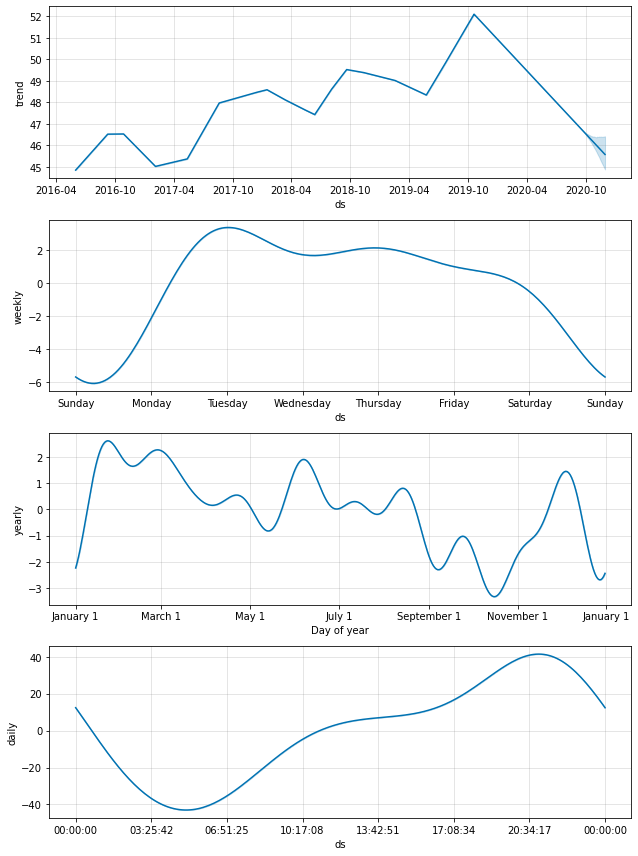

In [48]:
# Reset the index in the forecast_mercado_trends DataFrame
forecast_mercado_trends = forecast_mercado_trends.reset_index()

# Use the plot_components function to visualize the forecast results 
# for the forecast_mercado_trends DataFrame 
figures_mercado_trends = model_mercado_trends.plot_components(forecast_mercado_trends)


##### Answer the following questions:

**Question:** What time of day exhibits the greatest popularity?

**Answer:** 9pm

**Question:** Which day of week gets the most search traffic? 
   
**Answer:** Monday appears to have the greates increase in search traffic throughout the day with a peak late Monday evening, so highest search traffic for any given week is likely to be during that time. 

**Question:** What's the lowest point for search traffic in the calendar year?

**Answer:** The clear lowpoint for search traffic appears to be Sunday morning.


## Step 5 (Optional): Forecast Revenue by Using Time Series Models

A few weeks after your initial analysis, the finance group follows up to find out if you can help them solve a different problem. Your fame as a growth analyst in the company continues to grow!

Specifically, the finance group wants a forecast of the total sales for the next quarter. This will dramatically increase their ability to plan budgets and to help guide expectations for the company investors.

To do so, complete the following steps:

1. Read in the daily historical sales (that is, revenue) figures, and then apply a Prophet model to the data. The daily sales figures are quoted in millions of USD dollars.

2. Interpret the model output to identify any seasonal patterns in the company's revenue. For example, what are the peak revenue days? (Mondays? Fridays? Something else?)

3. Produce a sales forecast for the finance group. Give them a number for the expected total sales in the next quarter. Include the best- and worst-case scenarios to help them make better plans.




#### Step 1: Read in the daily historical sales (that is, revenue) figures, and then apply a Prophet model to the data.

In [51]:
# Upload the "mercado_daily_revenue.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the DatetimeIndex
# Sales are quoted in millions of US dollars

df_mercado_sales = pd.read_csv('mercado_daily_revenue.csv', parse_dates=True, infer_datetime_format=True)

# Review the DataFrame
df_mercado_sales.rename(columns={'Daily Sales': 'sales'}, inplace=True)
df_mercado_sales


,date,sales
0,2019-01-01,0.626452
1,2019-01-02,1.301069
2,2019-01-03,1.751689
3,2019-01-04,3.256294
4,2019-01-05,3.732920
...,...,...
495,2020-05-10,17.467814
496,2020-05-11,17.537152
497,2020-05-12,18.031773
498,2020-05-13,19.165315


In [63]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Use hvPlot to visualize the daily sales figures 
df_mercado_sales.hvplot(
    title='MercadoLibre Daily Revenue'
)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Apply a Facebook Prophet model to the data.

# Set up the dataframe in the neccessary format:
# Reset the index so that date becomes a column in the DataFrame
mercado_sales_prophet_df = # YOUR CODE HERE

# Adjust the columns names to the Prophet syntax
mercado_sales_prophet_df.columns = # YOUR CODE HERE

# Visualize the DataFrame
# YOUR CODE HERE


In [ ]:
# Create the model
mercado_sales_prophet_model = # YOUR CODE HERE

# Fit the model
# YOUR CODE HERE


In [ ]:
# Predict sales for 90 days (1 quarter) out into the future.

# Start by making a future dataframe
mercado_sales_prophet_future = # YOUR CODE HERE

# Display the last five rows of the future DataFrame
# YOUR CODE HERE


In [ ]:
# Make predictions for the sales each day over the next quarter
mercado_sales_prophet_forecast = # YOUR CODE HERE

# Display the first 5 rows of the resulting DataFrame
# YOUR CODE HERE


#### Step 2: Interpret the model output to identify any seasonal patterns in the company's revenue. For example, what are the peak revenue days? (Mondays? Fridays? Something else?)

In [ ]:
# Use the plot_components function to analyze seasonal patterns in the company's revenue
# YOUR CODE HERE


##### Answer the following question:

**Question:** For example, what are the peak revenue days? (Mondays? Fridays? Something else?)

**Answer:** # YOUR ANSWER HERE

#### Step 3: Produce a sales forecast for the finance group. Give them a number for the expected total sales in the next quarter. Include the best- and worst-case scenarios to help them make better plans.

In [ ]:
# Plot the predictions for the Mercado sales
# YOUR CODE HERE


In [ ]:
# For the mercado_sales_prophet_forecast DataFrame, set the ds column as the DataFrame Index
mercado_sales_prophet_forecast = # YOUR CODE HERE

# Display the first and last five rows of the DataFrame
# YOUR CODE HERE


In [ ]:
# Produce a sales forecast for the finance division
# giving them a number for expected total sales next quarter.
# Provide best case (yhat_upper), worst case (yhat_lower), and most likely (yhat) scenarios.

# Create a forecast_quarter Dataframe for the period 2020-07-01 to 2020-09-30
# The DataFrame should include the columns yhat_upper, yhat_lower, and yhat
mercado_sales_forecast_quarter = # YOUR CODE HERE

# Update the column names for the forecast_quarter DataFrame
# to match what the finance division is looking for 
mercado_sales_forecast_quarter = # YOUR CODE HERE

# Review the last five rows of the DataFrame
# YOUR CODE HERE


In [ ]:
# Displayed the summed values for all the rows in the forecast_quarter DataFrame
# YOUR CODE HERE


### Based on the forecast information generated above, produce a sales forecast for the finance division, giving them a number for expected total sales next quarter. Include best and worst case scenarios, to better help the finance team plan.

**Answer:** # YOUR ANSWER HERE